# Load Packages

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# MODELS
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, KFold

# Load Data and View it

In [122]:
data = load_iris()

features = data['data']
feature_names = data['feature_names']
target = data['target']
target_names = data['target_names']

data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

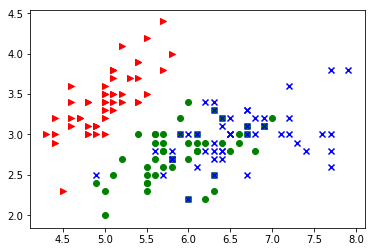

In [11]:
for t, marker, c in zip(xrange(3),">ox","rgb"):
    plt.scatter(features[target == t, 0], features[target == t, 1], marker = marker, c = c)
    
plt.show()

# Building Models

In [18]:
# ISOLATE PETAL LENGTH (COL HAS ABILITY TO CLASSIFY DATA)
petal_length = features[:, 2]

In [55]:
# GETTING MAX OF SETOSA PETAL LENGTH
max_setosa = features[target == 0, 2].max()

# GETTING MIN OF NON SETOSA PETAL LENGTH
min_non_setosa = features[target != 0, 2].min()

print('| Maximum of setosa: {0} | Minimum of others: {1} |'.format(max_setosa, min_non_setosa))

| Maximum of setosa: 1.9 | Minimum of others: 3.0 |


In [72]:

for i in (features[:, 2]):
    if( i < 2 ):
        print('Iris.Setosa')
    else:
        print('Iris.Virginica || Iris.Versicolour')

Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Setosa
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica || Iris.Versicolour
Iris.Virginica 

## Support Vector Classifier

In [79]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 42)

In [102]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.3, random_state=42)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
y_hat = clf.predict(X_test)

In [104]:
clf.score(X_test, y_test)

1.0

## Logistic Regression

In [34]:
clf = RFECV(LogisticRegression())
clf.fit(X_train, y_train)

RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [148]:
y_hat = clf.predict(X_test)

In [149]:
clf.score(X_test, y_test)

0.98333333333333328

In [156]:
clf = (LogisticRegressionCV())
clf.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [157]:
y_hat = clf.predict(X_test)

In [158]:
clf.score(X_test, y_test)

0.96666666666666667

### Logistics Regression with Regularization

In [40]:
weights, params, scores = [], [], []

In [61]:
C = [1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1e00, 1e01, 1e02, 1e03, 1e04, 1e05]
for c in C:
    clf = LogisticRegression(C=c, random_state=42)
    clf.fit(X_train, y_train)
    weights.append(clf.coef_[1])
    params.append(np.power(10, c))
    scores.append(clf.score(X_test, y_test))

C:\Users\Itch\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in power


In [62]:
print(scores)

[0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.29999999999999999, 0.29999999999999999, 0.29999999999999999, 0.68333333333333335, 0.83333333333333337, 0.96666666666666667, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328, 0.98333333333333328]


In [60]:
1e01

10.0

## Random Forest

In [148]:
clf = RFECV(RandomForestClassifier(criterion='gini', n_estimators=6, n_jobs=4, random_state=42))
clf.fit(X_train, y_train)

RFECV(cv=None,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=4,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [149]:
y_hat = clf.predict(X_test)

In [150]:
clf.score(X_test, y_test)

1.0

## Preceptron

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [32]:
clf = Perceptron(n_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train_std, y_train)

C:\Users\Itch\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=42,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [33]:
clf.score(X_test_std, y_test)

0.98333333333333328

## Pipeline

In [31]:
clf = KNeighborsClassifier(n_neighbors = 1)

pipeline = make_pipeline(StandardScaler(), clf)

kf = KFold(len(features), n_folds = 5, shuffle = True, random_state = 42)

In [35]:
score = []

for training, testing in kf:
    clf.fit(features[training], target[training])
    y_hat = clf.predict(features[testing])
    clf.score(features[testing], target[testing])
    score.append(clf.score(features[testing], target[testing]))
    
print(score)
print(np.mean(score))

[1.0, 0.96666666666666667, 0.96666666666666667, 0.90000000000000002, 0.96666666666666667]
0.96


## K Nearset Neighbors

In [151]:
clf = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [152]:
y_hat = clf.predict(X_test)

In [153]:
clf.score(X_test, y_test)

0.98333333333333328

## Using KFold

In [16]:
kf = KFold(len(features), n_folds = 5, shuffle = True, random_state = 42)

In [25]:
score = []

for training, testing in kf:
    clf.fit(features[training], target[training])
    y_hat = clf.predict(features[testing])
    clf.score(features[testing], target[testing])
    score.append(clf.score(features[testing], target[testing]))

In [26]:
print('| MEAN: {0} | SCORE: {1} |'.format(means, score))

| MEAN: [1.0, 0.96666666666666667, 0.96666666666666667, 0.90000000000000002, 0.96666666666666667] | SCORE: [1.0, 0.96666666666666667, 0.96666666666666667, 0.90000000000000002, 0.96666666666666667] |


In [27]:
print(np.mean(score))

0.96


## Decision Tree

In [117]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [119]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.98333333333333328

In [124]:
export_graphviz(tree, out_file='tree.dot', feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [129]:
dot -Tpng tree.dot -o tree.png

SyntaxError: invalid syntax (<ipython-input-129-42f931462896>, line 1)

In [131]:
export_graphviz?